# 1. Basics

## PyTorch Basics

In [1]:
import torch 

In [2]:
import torchvision

In [3]:
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [4]:
# ================================================================== #
#                         Table of Contents                          #
# ================================================================== #

# 1. Basic autograd example 1               (Line 25 to 39)
# 2. Basic autograd example 2               (Line 46 to 83)
# 3. Loading data from numpy                (Line 90 to 97)
# 4. Input pipline                          (Line 104 to 129)
# 5. Input pipline for custom dataset       (Line 136 to 156)
# 6. Pretrained model                       (Line 163 to 176)
# 7. Save and load model                    (Line 183 to 189) 

In [5]:
# ================================================================== #
#                     1. Basic autograd example 1                    #
# ================================================================== #

In [6]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [7]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

In [8]:
# Compute gradients.
y.backward()

In [9]:
# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [10]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #

In [11]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

In [12]:
# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.4992,  0.2770,  0.1992],
        [ 0.1647, -0.1774, -0.5663]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.3061, -0.1481], requires_grad=True)


In [13]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [14]:
# Forward pass.
pred = linear(x)

In [15]:
# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  1.0415191650390625


In [16]:
# Backward pass.
loss.backward()

In [17]:
# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[ 0.3719, -0.1274,  0.2646],
        [-0.1529,  0.1879, -0.3598]])
dL/db:  tensor([-0.3903, -0.0911])


In [18]:
# 1-step gradient descent.
optimizer.step()

In [19]:
# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  1.035805344581604


In [20]:
# ================================================================== #
#                     3. Loading data from numpy                     #
# ================================================================== #

In [21]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

In [22]:
y

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [23]:
z

array([[1, 2],
       [3, 4]])

In [24]:
# ================================================================== #
#                         4. Input pipline                           #
# ================================================================== #

# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)


Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [25]:
# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [26]:
# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass


In [29]:
# ================================================================== #
#                5. Input pipline for custom dataset                 #
# ================================================================== #

# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)

ValueError: num_samples should be a positive integer value, but got num_samples=0

这里报错是因为没写对应函数内容

In [30]:
# ================================================================== #
#                        6. Pretrained model                         #
# ================================================================== #

# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Mr. Wu/.cache\torch\checkpoints\resnet18-5c106cde.pth
100.0%


torch.Size([64, 100])


In [ ]:
# ================================================================== #
#                      7. Save and load the model                    #
# ================================================================== #

# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

## linear_regression

In [31]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

Epoch [5/60], Loss: 4.8994
Epoch [10/60], Loss: 2.1245
Epoch [15/60], Loss: 1.0003
Epoch [20/60], Loss: 0.5447
Epoch [25/60], Loss: 0.3601
Epoch [30/60], Loss: 0.2852
Epoch [35/60], Loss: 0.2547
Epoch [40/60], Loss: 0.2423
Epoch [45/60], Loss: 0.2372
Epoch [50/60], Loss: 0.2350
Epoch [55/60], Loss: 0.2340
Epoch [60/60], Loss: 0.2335


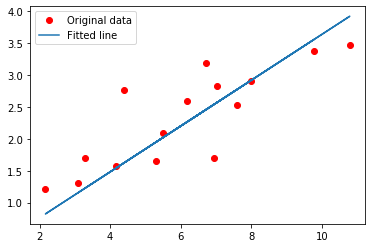

In [33]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## logistic_regression

In [34]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [35]:
# Hyper-parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [36]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

100.1%

Extracting ../../data\MNIST\raw\train-images-idx3-ubyte.gz to ../../data\MNIST\raw


113.5%

Extracting ../../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../../data\MNIST\raw


100.4%

Extracting ../../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data\MNIST\raw


180.4%

Extracting ../../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data\MNIST\raw
Processing...
Done!


In [37]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')


Epoch [1/5], Step [100/600], Loss: 2.2534
Epoch [1/5], Step [200/600], Loss: 2.1395
Epoch [1/5], Step [300/600], Loss: 2.0485
Epoch [1/5], Step [400/600], Loss: 1.9770
Epoch [1/5], Step [500/600], Loss: 1.8643
Epoch [1/5], Step [600/600], Loss: 1.8293
Epoch [2/5], Step [100/600], Loss: 1.7757
Epoch [2/5], Step [200/600], Loss: 1.6627
Epoch [2/5], Step [300/600], Loss: 1.5991
Epoch [2/5], Step [400/600], Loss: 1.6044
Epoch [2/5], Step [500/600], Loss: 1.4955
Epoch [2/5], Step [600/600], Loss: 1.4027
Epoch [3/5], Step [100/600], Loss: 1.4214
Epoch [3/5], Step [200/600], Loss: 1.4436
Epoch [3/5], Step [300/600], Loss: 1.3576
Epoch [3/5], Step [400/600], Loss: 1.2695
Epoch [3/5], Step [500/600], Loss: 1.2638
Epoch [3/5], Step [600/600], Loss: 1.3191
Epoch [4/5], Step [100/600], Loss: 1.2104
Epoch [4/5], Step [200/600], Loss: 1.1853
Epoch [4/5], Step [300/600], Loss: 1.1690
Epoch [4/5], Step [400/600], Loss: 1.2242
Epoch [4/5], Step [500/600], Loss: 1.2125
Epoch [4/5], Step [600/600], Loss:

## feedforward_neural_network

In [38]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [39]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [40]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [41]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [42]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [43]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [44]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [45]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.3070
Epoch [1/5], Step [200/600], Loss: 0.2062
Epoch [1/5], Step [300/600], Loss: 0.2144
Epoch [1/5], Step [400/600], Loss: 0.2050
Epoch [1/5], Step [500/600], Loss: 0.1291
Epoch [1/5], Step [600/600], Loss: 0.0825
Epoch [2/5], Step [100/600], Loss: 0.0569
Epoch [2/5], Step [200/600], Loss: 0.1050
Epoch [2/5], Step [300/600], Loss: 0.0758
Epoch [2/5], Step [400/600], Loss: 0.0716
Epoch [2/5], Step [500/600], Loss: 0.0689
Epoch [2/5], Step [600/600], Loss: 0.1437
Epoch [3/5], Step [100/600], Loss: 0.1478
Epoch [3/5], Step [200/600], Loss: 0.0412
Epoch [3/5], Step [300/600], Loss: 0.0744
Epoch [3/5], Step [400/600], Loss: 0.2049
Epoch [3/5], Step [500/600], Loss: 0.0392
Epoch [3/5], Step [600/600], Loss: 0.0641
Epoch [4/5], Step [100/600], Loss: 0.1016
Epoch [4/5], Step [200/600], Loss: 0.0419
Epoch [4/5], Step [300/600], Loss: 0.0731
Epoch [4/5], Step [400/600], Loss: 0.0556
Epoch [4/5], Step [500/600], Loss: 0.1559
Epoch [4/5], Step [600/600], Loss:

In [53]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 98.02 %


In [47]:
?torch.max

In [48]:
a = torch.randn(1, 3)

In [50]:
a

tensor([[ 0.4084, -0.4905, -1.0438]])

In [51]:
torch.max(a, 1)

torch.return_types.max(
values=tensor([0.4084]),
indices=tensor([0]))

# Intermediate

## Convolutional Neural Network

In [54]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [56]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [57]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)